## BBC News Categorization using Keras

In this notebook, I am going to train a model to categorize BBC news using embedding technique.

The dataset contains 5 news categories namely: business, entertainment, politics, sport, and tech. 

There are 2225 rows and 4 columns. However, only 2 columns (category and content) are used.
 
![](https://images.spot.im/v1/production/jyzxethffjsr6xwwz0ky)

*Image Source: Daily Express*

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from tensorflow import keras
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

      category filename                              title  \
0     business  001.txt  Ad sales boost Time Warner profit   
1     business  002.txt   Dollar gains on Greenspan speech   
2     business  003.txt  Yukos unit buyer faces loan claim   
3     business  004.txt  High fuel prices hit BA's profits   
4     business  005.txt  Pernod takeover talk lifts Domecq   
...        ...      ...                                ...   
2220      tech  397.txt   BT program to beat dialler scams   
2221      tech  398.txt    Spam e-mails tempt net shoppers   
2222      tech  399.txt            Be careful how you code   
2223      tech  400.txt    US cyber security chief resigns   
2224      tech  401.txt   Losing yourself in online gaming   

                                                content  
0      Quarterly profits at US media giant TimeWarne...  
1      The dollar has hit its highest level against ...  
2      The owners of embattled Russian oil giant Yuk...  
3      British Airways 

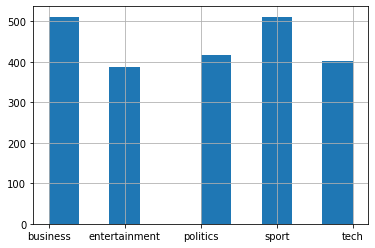

In [2]:
# read the csv file

df = pd.read_csv("../input/bbcnewsarchive/bbc-news-data.csv", sep="\t")

print(df)

df["category"].hist()

In [3]:
# shuffle the dataframe to evenly distribute the labels

df = df.sample(frac=1).reset_index(drop=True)
df

,category,filename,title,content
0,sport,385.txt,Lions blow to World Cup stars,British and Irish Lions coach Clive Woodward ...
1,tech,339.txt,Hotspot users gain free net calls,People using wireless net hotspots will soon ...
2,tech,236.txt,Google to scan famous libraries,The libraries of five of the world's most imp...
3,entertainment,020.txt,Public show for Reynolds portrait,Sir Joshua Reynolds' Portrait of Omai will ge...
4,politics,068.txt,MPs to debate 'euthanasia laws',MPs are preparing to debate a bill which crit...
...,...,...,...,...
2220,entertainment,191.txt,Little Britain vies for TV trophy,BBC hits Little Britain and Strictly Come Dan...
2221,entertainment,120.txt,'My memories of Marley...',To mark the 60th anniversary of the birth of ...
2222,entertainment,284.txt,DJ double act revamp chart show,DJ duo JK and Joel are taking over BBC Radio ...
2223,business,059.txt,Worldcom ex-boss launches defence,Lawyers defending former WorldCom chief Berni...


In [4]:
content = []
labels = []

for label in df.category:
    labels.append(label)
    
for con in df.content:
    for word in stopwords:
        token = " " + word + " "
        con = con.replace(token, " ")
        con = con.replace(" ", " ")
    content.append(con)

print(len(content))
print(len(labels))
print("\nContent:", content[0])
print("\nLabel:", labels[0])

2225
2225

Content:  British Irish Lions coach Clive Woodward says unlikely select players not involved next year's RBS Six Nations Championship.  World Cup winners Lawrence Dallaglio, Neil Back Martin Johnson thought frame next summer's tour New Zealand. "I don't think can ever say never," said Woodward. "But I compulsive reason pick player not available international rugby." Dallaglio, Back Johnson retired international rugby last 12 months continue star club sides. But Woodward added: "The key thing I want stress I intend use Six Nations players available international rugby key benchmark. "My job, along senior representatives, make sure pick strongest possible team. "If not playing international rugby still step Test rugby. It's definitely disadvantage.  "I think absolutely critical history Lions got take players playing four countries." Woodward also revealed race captaincy still wide open. "It open book," said. "There outstanding candidates four countries." And following All Blac

In [5]:
# split the dataset into training set and test set

train_content, test_content = content[:1900], content[1900:]
train_labels, test_labels = labels[:1900], labels[1900:]

train_content = np.array(train_content)
test_content = np.array(test_content)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

print(len(train_content))
print(len(train_labels))
print(len(test_content))
print(len(test_labels))

1900
1900
325
325


In [6]:
# check the distribution of labels in the training set and test set

unique_train_content, number_train_content = np.unique(train_labels, return_counts=True)

print("Training set labels:")
print(unique_train_content)
print(number_train_content)

unique_test_content, number_test_content = np.unique(test_labels, return_counts=True)

print("\nTest set labels:")
print(unique_test_content)
print(number_test_content)

Training set labels:
['business' 'entertainment' 'politics' 'sport' 'tech']
[433 324 358 440 345]

Test set labels:
['business' 'entertainment' 'politics' 'sport' 'tech']
[77 62 59 71 56]


In [7]:
# tokenize the content

vocab_size = 10000
embedding_dim = 32
max_len = 200
trunc_type = "post"
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_content)

word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(train_content)
padded = pad_sequences(sequences, maxlen=max_len, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_content)
test_padded = pad_sequences(test_sequences, maxlen=max_len, truncating=trunc_type)

print(test_padded.shape)

(325, 200)


In [8]:
# tokenize the labels

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index

label_sequences = np.array(label_tokenizer.texts_to_sequences(train_labels))

test_label_sequences = np.array(label_tokenizer.texts_to_sequences(test_labels))

print(label_sequences.shape)
print(test_label_sequences.shape)

(1900, 1)
(325, 1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           320000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               4224      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
Total params: 324,998
Trainable params: 324,998
Non-trainable params: 0
_________________________________________________________________


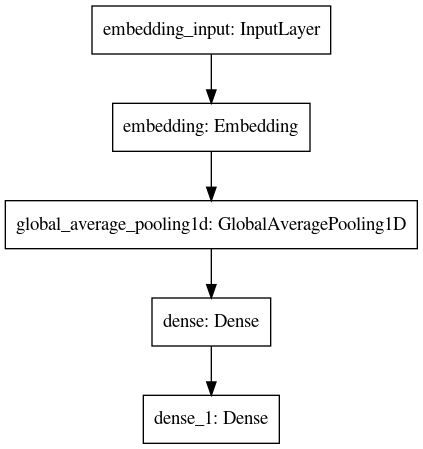

In [9]:
# define an NN model

model = keras.Sequential([layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
                        
                         layers.GlobalAveragePooling1D(), #simpler and faster than Flatten()
                         layers.Dense(128, activation="relu"),
                         layers.Dense(6, activation="softmax")])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()
keras.utils.plot_model(model)

In [10]:
# train the model

num_epochs = 10

history = model.fit(padded,
                   label_sequences,
                   epochs=num_epochs,
                   validation_data = (test_padded, test_label_sequences))

Epoch 1/10
60/60 [==============================] - 0s 8ms/step - loss: 1.7108 - accuracy: 0.2574 - val_loss: 1.5797 - val_accuracy: 0.4000
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 1.3536 - accuracy: 0.6205 - val_loss: 1.1464 - val_accuracy: 0.6585
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 0.8174 - accuracy: 0.8658 - val_loss: 0.6315 - val_accuracy: 0.9231
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3654 - accuracy: 0.9742 - val_loss: 0.3297 - val_accuracy: 0.9508
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.1634 - accuracy: 0.9900 - val_loss: 0.2113 - val_accuracy: 0.9569
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 0.0878 - accuracy: 0.9942 - val_loss: 0.1621 - val_accuracy: 0.9538
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.0534 - accuracy: 0.9968 - val_loss: 0.1331 - val_accuracy: 0.9569
Epoch 8/10
60/60 [==

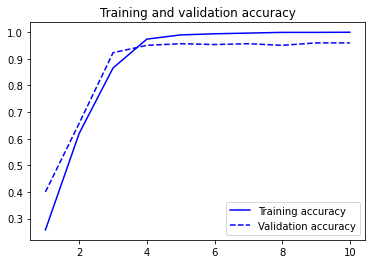

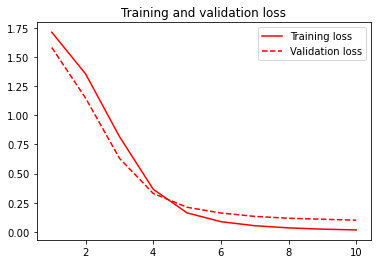

In [11]:
# plot accuracy and loss

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

# accuracy

plt.plot(epochs, acc, "b", label="Training accuracy")
plt.plot(epochs, val_acc, "b--", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

# loss

plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "r--", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### The Result 

> **After training for 10 epochs, the model was able to reach 100% accuracy on training set and near 100% on the validation set.**